<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-gerardoaaron_castanedajaramillo/blob/main/Actividad%20Semanal%20--%206.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> # **Actividad Semanal -- 6**
>## **Maestría en Inteligencia Artificial Aplicada**
>### **Curso: TC4029.10 Ciencia y analítica de datos (Gpo 10)**
>## **Tecnológico de Monterrey**




### **Gerardo Aaron Castañeda Jaramillo  -  Matrícula A01137646**
### **1 de noviembre del 2022**

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing

import matplotlib.pyplot as plt 
import seaborn as sns 

## **1) Descarga los datosy carga el dataset en tu libreta**

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv', index_col = 0)
df.index.name = None

## **2) Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()**

shape:

In [3]:
df.shape

(30000, 24)

columns

In [4]:
df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'Y'],
      dtype='object')

head()

In [5]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [6]:
df.dtypes

X1       int64
X2     float64
X3     float64
X4     float64
X5     float64
X6     float64
X7     float64
X8     float64
X9     float64
X10    float64
X11    float64
X12    float64
X13    float64
X14    float64
X15    float64
X16    float64
X17    float64
X18    float64
X19    float64
X20    float64
X21    float64
X22    float64
X23    float64
Y      float64
dtype: object

info()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      30000 non-null  int64  
 1   X2      29999 non-null  float64
 2   X3      29998 non-null  float64
 3   X4      29998 non-null  float64
 4   X5      29995 non-null  float64
 5   X6      29997 non-null  float64
 6   X7      29995 non-null  float64
 7   X8      29993 non-null  float64
 8   X9      29991 non-null  float64
 9   X10     29984 non-null  float64
 10  X11     29986 non-null  float64
 11  X12     29989 non-null  float64
 12  X13     29989 non-null  float64
 13  X14     29987 non-null  float64
 14  X15     29985 non-null  float64
 15  X16     29983 non-null  float64
 16  X17     29990 non-null  float64
 17  X18     29992 non-null  float64
 18  X19     29991 non-null  float64
 19  X20     29992 non-null  float64
 20  X21     29989 non-null  float64
 21  X22     29989 non-null  float64
 22

isna()

In [8]:
df.isna()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29999,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## **3) Limpia los datos eliminando los registros nulos o rellena con la media de la columna**


In [9]:
df_norm = df.copy()

#eliminamos valores mayores a 4 en X3 
X3_values = []
for i in range(0,len(df_norm.index)):
  if df_norm['X3'].iloc[i] > 4:
    if df_norm['X3'].iloc[i] not in X3_values:
      X3_values.append(int(df_norm['X3'].iloc[i]))
for i in X3_values:
  df_norm['X3'].replace(i,4,inplace=True)

#sustituimos valores de x3 de 0 por valor 4 de others
df_norm['X3'].replace(0,4,inplace=True)

#sustituimos valores de 0 en X4 por por 3, ya que entra dentro de el valor 3 = others
df_norm['X4'].replace(0,3,inplace=True)

#cambimos valores de -2 de X6 a X11 por -1
df_norm.iloc[:,5:11] = df_norm.iloc[:,5:11].replace(-2,-1)

#cambiamos valores negativos de X12 a X24
for col in df_norm.iloc[:,11:23].columns:
  df_norm[col] = df_norm[col].abs()

#eliminamos las filas con valores nulos, que representan 42/30000
df_norm.dropna(axis=0,inplace=True)

In [10]:
df_norm.reset_index(drop=True, inplace=True)

Cambiaremos los nombres de las columnas para su más sencilla visualización

In [11]:
columns_name = ['BAL','SEX','EDUCATION','MARRIAGE','AGE','PAYSTAT_1','PAYSTAT_2','PAYSTAT_3','PAYSTAT_4','PAYSTAT_5','PAYSTAT_6','BILL_1','BILL_2','BILL_3','BILL_4','BILL_5','BILL_6','PAY_1',
                'PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','Y']
df_norm.columns = columns_name
df_norm.columns

Index(['BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAYSTAT_1', 'PAYSTAT_2',
       'PAYSTAT_3', 'PAYSTAT_4', 'PAYSTAT_5', 'PAYSTAT_6', 'BILL_1', 'BILL_2',
       'BILL_3', 'BILL_4', 'BILL_5', 'BILL_6', 'PAY_1', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'Y'],
      dtype='object')

In [12]:
#por si se ocupa
X = df_norm.drop('Y',axis = 1)
Y = df_norm['Y']

## **4) Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión**



In [13]:
df_norm.describe()

,BAL,SEX,EDUCATION,MARRIAGE,AGE,PAYSTAT_1,PAYSTAT_2,PAYSTAT_3,PAYSTAT_4,PAYSTAT_5,...,BILL_4,BILL_5,BILL_6,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,Y
count,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,...,29958.000000,29958.000000,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000
mean,167555.900928,1.604012,1.842212,1.557147,35.483443,0.074938,-0.007911,-0.030509,-0.076140,-0.115228,...,43352.650744,40400.248481,39030.921757,5664.614460,5.925715e+03,5228.429969,4829.873556,4801.481574,5220.708025,0.221143
std,129737.299088,0.489070,0.744557,0.521388,9.214319,0.990875,1.035749,1.023999,0.986597,0.940891,...,64315.324165,60778.908226,59490.613448,16568.823518,2.305598e+04,17617.338167,15676.205514,15285.552652,17788.983767,0.415023
min,10000.000000,1.000000,1.000000,1.000000,21.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2400.000000,1864.250000,1357.500000,1000.000000,8.352500e+02,390.000000,296.250000,253.250000,118.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19060.500000,18126.500000,17128.500000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54573.000000,50241.750000,49273.250000,5007.000000,5.000000e+03,4511.500000,4014.750000,4040.000000,4000.000000,0.000000
max,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


**Espacio para explicacion**

## **5) Realiza el conteo de las variables categóricas**


In [14]:
cat_nom = ['SEX','EDUCATION','MARRIAGE','PAYSTAT_1','PAYSTAT_2','PAYSTAT_3','PAYSTAT_4','PAYSTAT_5','PAYSTAT_6','Y']

for col in cat_nom:
  print(df_norm[col].value_counts(),'\n')

2.0    18095
1.0    11863
Name: SEX, dtype: int64 

2.0    14009
1.0    10572
3.0     4909
4.0      468
Name: EDUCATION, dtype: int64 

2.0    15939
1.0    13643
3.0      376
Name: MARRIAGE, dtype: int64 

 0.0    14717
-1.0     8438
 1.0     3678
 2.0     2662
 3.0      322
 4.0       76
 5.0       26
 8.0       19
 6.0       11
 7.0        9
Name: PAYSTAT_1, dtype: int64 

 0.0    15709
-1.0     9820
 2.0     3918
 3.0      326
 4.0       99
 1.0       28
 5.0       25
 7.0       20
 6.0       12
 8.0        1
Name: PAYSTAT_2, dtype: int64 

 0.0    15742
-1.0    10012
 2.0     3811
 3.0      240
 4.0       76
 7.0       27
 6.0       23
 5.0       21
 1.0        4
 8.0        2
Name: PAYSTAT_3, dtype: int64 

 0.0    16431
-1.0    10024
 2.0     3154
 3.0      179
 4.0       69
 7.0       57
 5.0       35
 6.0        5
 1.0        2
 8.0        2
Name: PAYSTAT_4, dtype: int64 

 0.0    16925
-1.0    10074
 2.0     2618
 3.0      178
 4.0       84
 7.0       57
 5.0       17
 6.0    

## **6) Escala los datos, si consideras necesario**

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
num_nom = ['BAL','AGE','BILL_1','BILL_2','BILL_3','BILL_4','BILL_5','BILL_6','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']

df_norm[num_nom].describe()

,BAL,AGE,BILL_1,BILL_2,BILL_3,BILL_4,BILL_5,BILL_6,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,29958.000000,29958.000000,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000
mean,167555.900928,35.483443,51293.558248,49255.409173,4.709646e+04,43352.650744,40400.248481,39030.921757,5664.614460,5.925715e+03,5228.429969,4829.873556,4801.481574,5220.708025
std,129737.299088,9.214319,73643.321281,71173.258659,6.934177e+04,64315.324165,60778.908226,59490.613448,16568.823518,2.305598e+04,17617.338167,15676.205514,15285.552652,17788.983767
min,10000.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3594.250000,3048.500000,2.776000e+03,2400.000000,1864.250000,1357.500000,1000.000000,8.352500e+02,390.000000,296.250000,253.250000,118.000000
50%,140000.000000,34.000000,22383.000000,21224.000000,2.009350e+04,19060.500000,18126.500000,17128.500000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,67224.500000,64064.500000,6.018725e+04,54573.000000,50241.750000,49273.250000,5007.000000,5.000000e+03,4511.500000,4014.750000,4040.000000,4000.000000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


In [17]:
scaler = StandardScaler()
df_scaled = df_norm.copy()

for col in num_nom:
  df_scaled[[col]] = scaler.fit_transform(df_norm[[col]])

df_scaled[num_nom].describe()

,BAL,AGE,BILL_1,BILL_2,BILL_3,BILL_4,BILL_5,BILL_6,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,2.995800e+04,2.995800e+04,2.995800e+04,2.995800e+04,2.995800e+04,2.995800e+04,2.995800e+04,2.995800e+04,2.995800e+04,2.995800e+04,2.995800e+04,2.995800e+04,2.995800e+04,2.995800e+04
mean,-3.794874e-18,-2.201027e-16,-2.656412e-17,-4.079490e-17,1.423078e-17,-7.589748e-18,-3.937182e-17,5.312824e-17,1.423078e-17,-1.043590e-17,-1.897437e-17,2.182053e-17,-3.794874e-18,9.605775e-18
std,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00
min,-1.214443e+00,-1.571867e+00,-6.965250e-01,-6.920609e-01,-6.792045e-01,-6.740753e-01,-6.647195e-01,-6.560963e-01,-3.418896e-01,-2.570185e-01,-2.967825e-01,-3.081074e-01,-3.141242e-01,-2.934847e-01
25%,-9.061223e-01,-8.121673e-01,-6.477180e-01,-6.492281e-01,-6.391702e-01,-6.367586e-01,-6.340463e-01,-6.332772e-01,-2.815343e-01,-2.207909e-01,-2.746448e-01,-2.892090e-01,-2.975560e-01,-2.868513e-01
50%,-2.124012e-01,-1.609960e-01,-3.925820e-01,-3.938541e-01,-3.894248e-01,-3.777102e-01,-3.664778e-01,-3.681722e-01,-2.151435e-01,-1.698813e-01,-1.946087e-01,-2.124193e-01,-2.159907e-01,-2.091615e-01
75%,5.584000e-01,5.987039e-01,2.163293e-01,2.080745e-01,1.887897e-01,1.744613e-01,1.619257e-01,1.721700e-01,-3.969053e-02,-4.015144e-02,-4.069525e-02,-5.199837e-02,-4.981791e-02,-6.862272e-02
max,6.416489e+00,4.722789e+00,1.240075e+01,1.313262e+01,2.331956e+01,1.318889e+01,1.459035e+01,1.550914e+01,5.238162e+01,7.279504e+01,5.056533e+01,3.930673e+01,2.759040e+01,2.942574e+01


## **7) Reduce las dimensiones con PCA, si consideras necesario**

### 1) Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70%

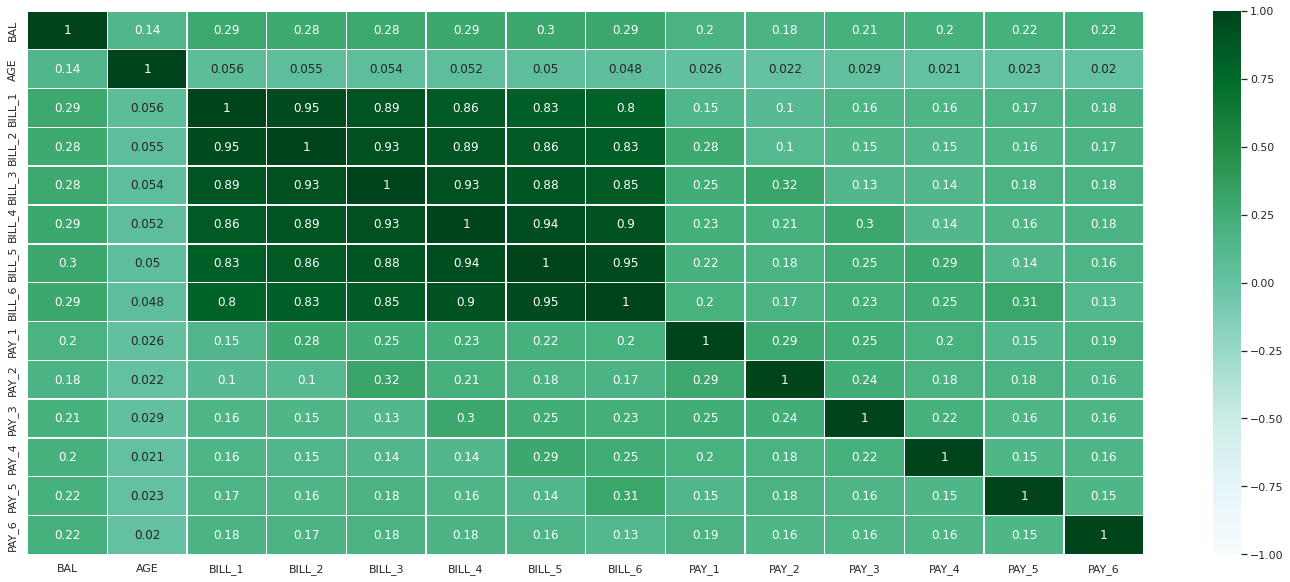

In [18]:
corrs = df_scaled[num_nom].corr()

sns.set(rc = {'figure.figsize':(25,10)})
sns.heatmap(corrs, vmin = -1, vmax = 1, cmap = "BuGn", annot= True, linewidths=0.5)

In [19]:
Varience = np.cov(df_scaled[num_nom])
Varience

array([[ 0.09855445,  0.05873296,  0.02405292, ...,  0.05482134,
         0.13462329, -0.04466394],
       [ 0.05873296,  0.05996909,  0.01243276, ...,  0.02275172,
         0.04635209, -0.0728375 ],
       [ 0.02405292,  0.01243276,  0.02507056, ...,  0.04552031,
         0.04651452,  0.02445099],
       ...,
       [ 0.05482134,  0.02275172,  0.04552031, ...,  0.2175491 ,
         0.02598707,  0.06828943],
       [ 0.13462329,  0.04635209,  0.04651452, ...,  0.02598707,
         2.43806621,  0.04228367],
       [-0.04466394, -0.0728375 ,  0.02445099, ...,  0.06828943,
         0.04228367,  0.18447319]])

In [20]:
print(len(df_scaled[num_nom].columns))

14


In [21]:
total = 0
for i in range(0,len(df_scaled[num_nom].columns)-1):
  total = total + Varience[i][i]
print('Total Varience \t\t\t:', total.round(2))
min_val = total
minv_str = ''
max_val = 0
maxv_str = ''
x_val = 0
for i in range(0,len(df_scaled[num_nom].columns)-1):
  x_val = ((Varience[i][i]/total)*100).round(2)
  str_val = str(num_nom[i])
  if x_val > max_val:
    max_val = x_val
    maxv_str = num_nom[i]
  elif x_val < min_val:
    min_val = x_val
    minv_str = num_nom[i]
  print('Varience prop. of ' + str_val + ': ' + str(x_val) + '%' )

print('Min value is: ' + str(min_val) + '% in ' + minv_str)
print('Max value is: ' + str(max_val) + '% in ' + maxv_str)

Total Varience 			: 11.14
Varience prop. of BAL: 0.88%
Varience prop. of AGE: 0.54%
Varience prop. of BILL_1: 0.22%
Varience prop. of BILL_2: 0.52%
Varience prop. of BILL_3: 6.54%
Varience prop. of BILL_4: 0.74%
Varience prop. of BILL_5: 72.24%
Varience prop. of BILL_6: 0.86%
Varience prop. of PAY_1: 0.33%
Varience prop. of PAY_2: 1.32%
Varience prop. of PAY_3: 0.61%
Varience prop. of PAY_4: 4.68%
Varience prop. of PAY_5: 10.53%
Min value is: 0.22% in BILL_1
Max value is: 72.24% in BILL_5


Donde podemos ver que, de las variables, la de mayor importancia es BILL_5 con un 72.24%, y la de menor importancia es BILL_1 con 0.22%

Y ahora utilizamos el método de PCA

In [22]:
pcs = PCA()
pcs.fit(df_scaled[num_nom])

PCA()

Presentamos la variación estándar, la proporción de la variancia, y la proporción cumulativa en base los componentes principales

In [23]:
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })

pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4) 

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Standard deviation,2.4350,1.3082,1.0222,0.9620,0.9383,0.9333,0.8820,0.8521,0.8413,0.5139,0.2680,0.2022,0.1605,0.1537
Proportion of variance,0.4235,0.1222,0.0746,0.0661,0.0629,0.0622,0.0556,0.0519,0.0506,0.0189,0.0051,0.0029,0.0018,0.0017
Cumulative proportion,0.4235,0.5457,0.6204,0.6865,0.7494,0.8116,0.8671,0.9190,0.9696,0.9884,0.9936,0.9965,0.9983,1.0000


Evaluamos en base a la proporción cumulativa cuantos componentes principales son necesarios para llegar a una variabilidad arriba al 70%

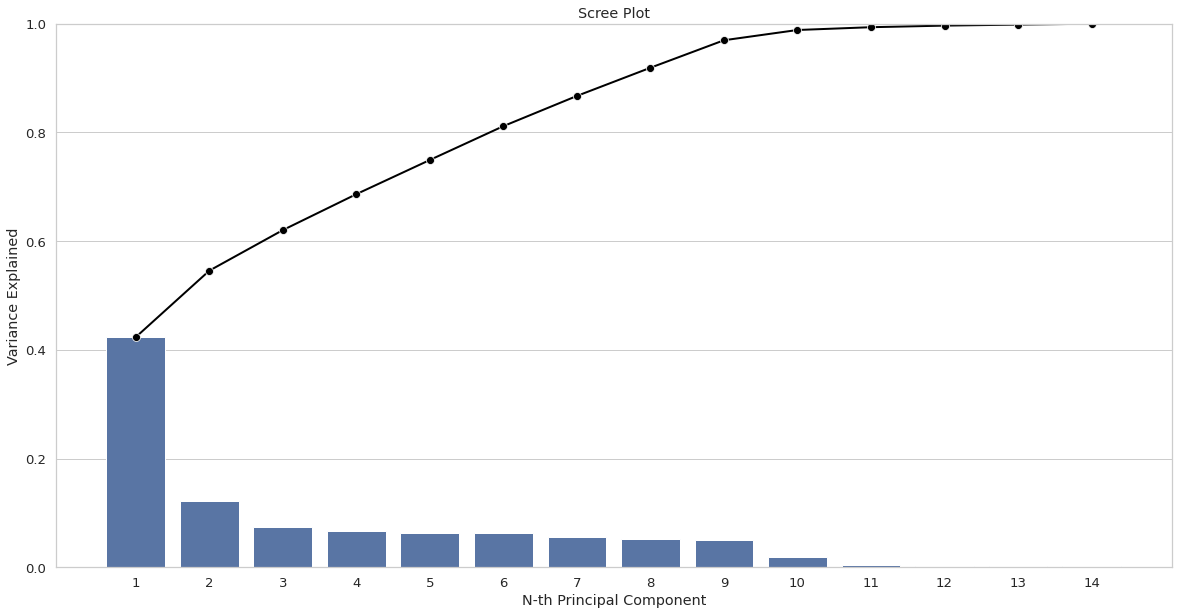

In [24]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(20, 10))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

In [25]:
pcsSummary_df.iloc[2,4].round(4)*100

74.94

In [26]:
(1 - pcsSummary_df.iloc[2,4]).round(4)*100

25.06

*   El primer componente principal abarca únicamente un 42% de la variabilidad
*   Es necesario abarcar hasta PC5 para llegar a un 74.94% de variabilidad
*   Existe una pérdida de variación del 25.06% incluyendo 5 componentes principales

### 2) Indica la importancia de las variables en cada componente

In [27]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns=pcsSummary_df.columns,
                                index=df_scaled[num_nom].columns
                                )
pcsComponents_df.iloc[:,:5]

,PC1,PC2,PC3,PC4,PC5
BAL,0.165565,0.300538,-0.378209,-0.199249,-0.025290
AGE,0.032799,0.071926,-0.870358,0.336170,0.028978
BILL_1,0.372395,-0.191181,-0.032392,-0.058608,-0.035930
BILL_2,0.382992,-0.175861,-0.001193,0.010543,-0.078185
BILL_3,0.388074,-0.127792,0.034773,0.063238,-0.123864
BILL_4,0.391472,-0.120484,0.033747,0.073973,-0.021841
BILL_5,0.388217,-0.107094,0.033053,0.036804,0.120742
BILL_6,0.380670,-0.092900,0.016839,-0.077661,0.143763
PAY_1,0.135517,0.382542,0.172912,0.363005,-0.232924
PAY_2,0.116982,0.408651,0.199867,0.346810,-0.202384


Ahora evaluamos las variables con el mayor valor absoluto en los coeficientes PC1 a PC5

In [28]:
for pc in pcsComponents_df.iloc[:,:5]:
  print('Top 3 variables con mayores coeficientes en magnitud de: ' + pc)
  indexes_abs = pcsComponents_df[pc].abs().nlargest(3).index
  individual_pc = pcsComponents_df[pc]
  print(individual_pc[indexes_abs])

Top 3 variables con mayores coeficientes en magnitud de: PC1
BILL_4    0.391472
BILL_5    0.388217
BILL_3    0.388074
Name: PC1, dtype: float64
Top 3 variables con mayores coeficientes en magnitud de: PC2
PAY_2    0.408651
PAY_3    0.392692
PAY_1    0.382542
Name: PC2, dtype: float64
Top 3 variables con mayores coeficientes en magnitud de: PC3
AGE     -0.870358
BAL     -0.378209
PAY_2    0.199867
Name: PC3, dtype: float64
Top 3 variables con mayores coeficientes en magnitud de: PC4
PAY_5   -0.610840
PAY_6   -0.365528
PAY_1    0.363005
Name: PC4, dtype: float64
Top 3 variables con mayores coeficientes en magnitud de: PC5
PAY_4    0.641375
PAY_6   -0.597160
PAY_3    0.255365
Name: PC5, dtype: float64


Y donde podemos ver las 3 variables con mayor magnitud de cada componente principal

## **8) Elabora los histogramas de los atributos para visualizar su distribución**

Vemos los histogramas previo a su escalamiento para tener mas claro los valores de su distribución:

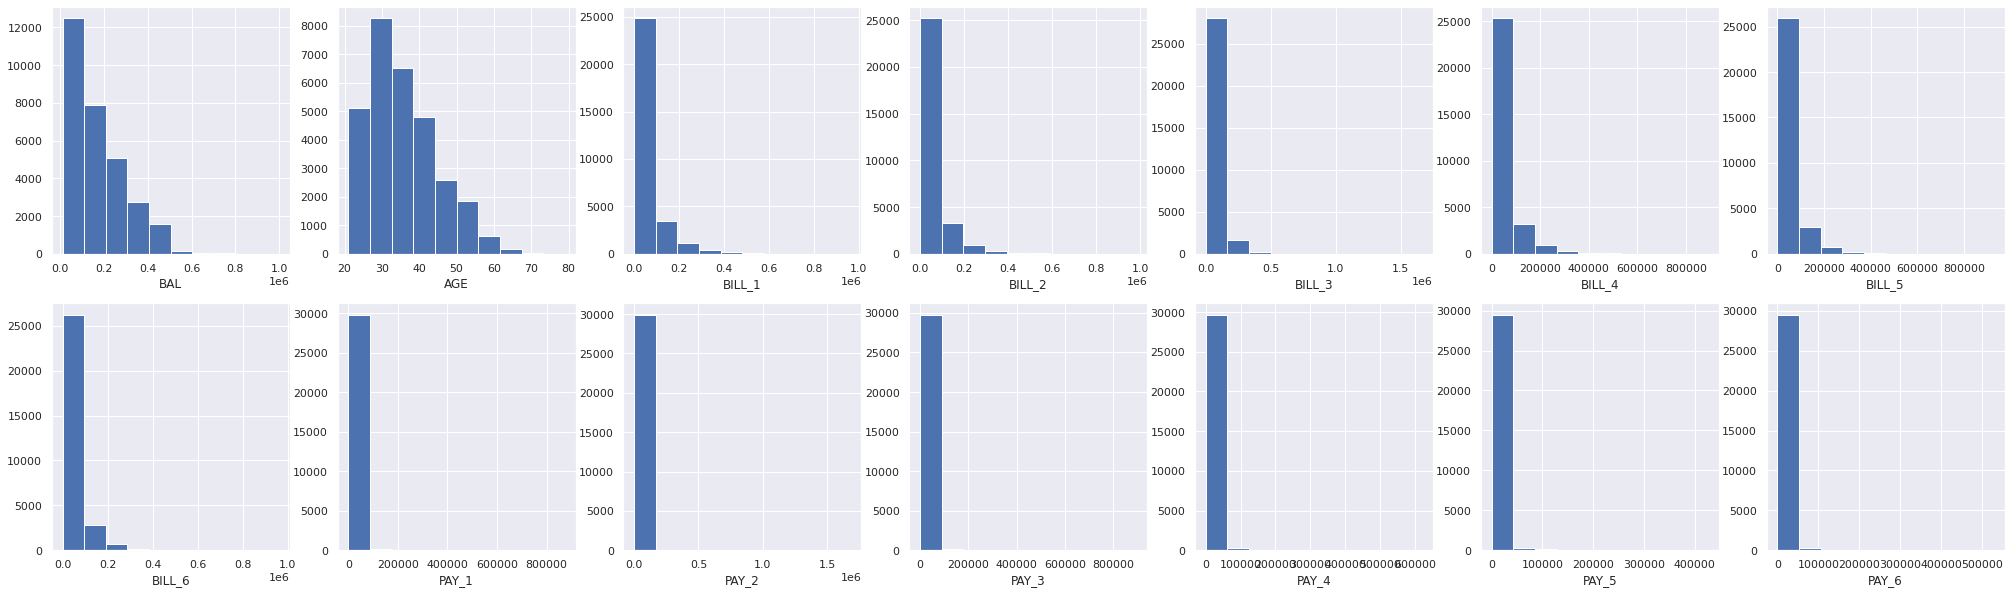

In [34]:
#df_scaled[num_nom].columns
#df_norm
sns.set(rc={'figure.figsize':(35,10)})
fig, axes = plt.subplots(2, 7)
i = 0
for col in df_norm[num_nom].columns:
  plt.subplot(2, 7,i+1) 
  plt.hist(df_norm[col], bins=10) 
  plt.xlabel(df_norm[num_nom].columns[i])
  i = i + 1

Vemos los histogramas de los componentes principales:

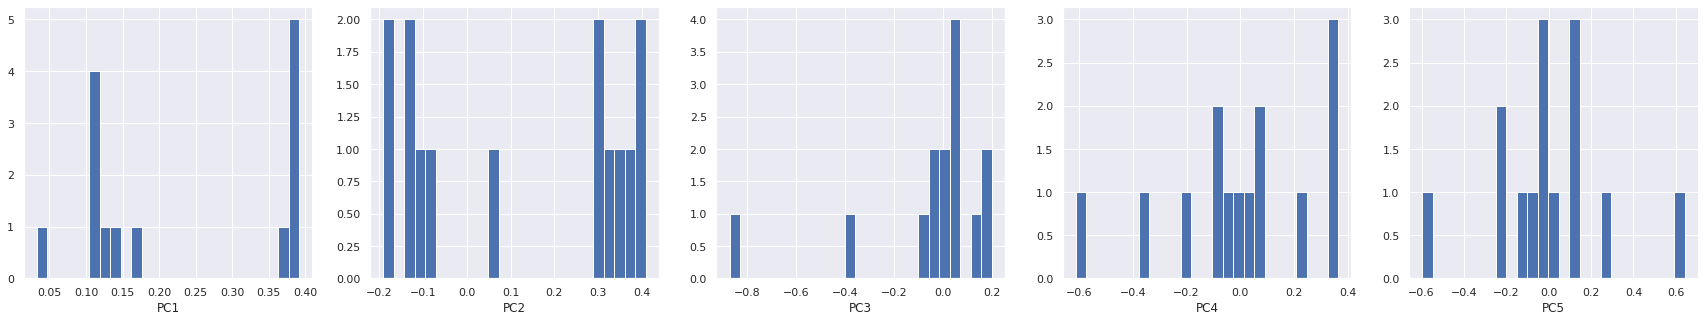

In [37]:
sns.set(rc={'figure.figsize':(30,5)})
fig, axes = plt.subplots(1, 5)
i = 0
for pc in pcsComponents_df.iloc[:,:5]:
  plt.subplot(1, 5,i+1) 
  plt.hist(pcsComponents_df[pc], bins=25) 
  plt.xlabel(pcsComponents_df.columns[i])
  i = i + 1

## **9) Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.**


Observamos los diagramas de bigote de los datos numéricos:

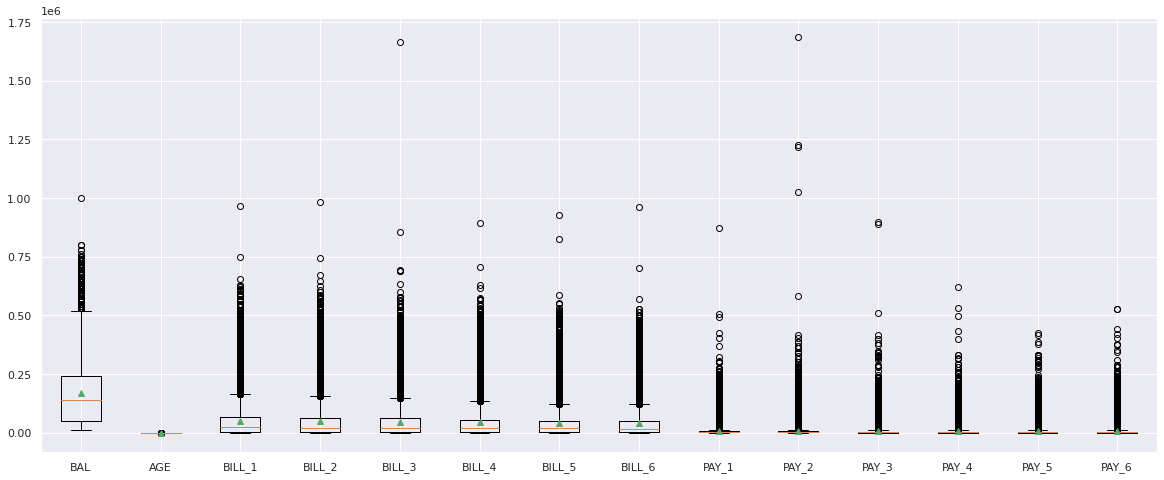

In [44]:
sns.set(rc={'figure.figsize':(20,8)})

bppc = list()
for col in df_norm[num_nom].columns:
  rr = df_norm[col]
  bppc.append(rr)

plt.boxplot(bppc, labels=df_norm[num_nom].columns, showmeans=True)

plt.show()


Donde podemos observar que existen muchos valores atípicos. Sería conveniente aplicar algún tipo de transformación a los datos para intentar normalizarlos. 

Observamos los diagramas de bigote de los componentes principales:

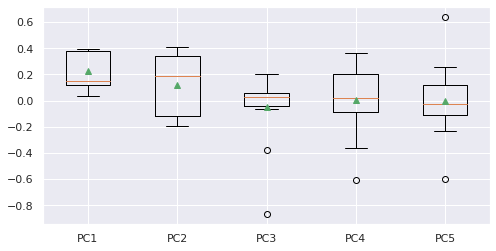

In [ ]:
sns.set(rc={'figure.figsize':(8,4)})

bppc = list()
for pc in pcsComponents_df.iloc[:,:5]:
  rr = pcsComponents_df[pc]
  bppc.append(rr)

plt.boxplot(bppc, labels=pcsComponents_df.columns[0:5], showmeans=True)

plt.show()

Donde podemos observar que PC3, PC4, y PC5 tienen valores atípicos

Podemos graficar en pie charts las variables categóricas para visualizar mejor su distribución:

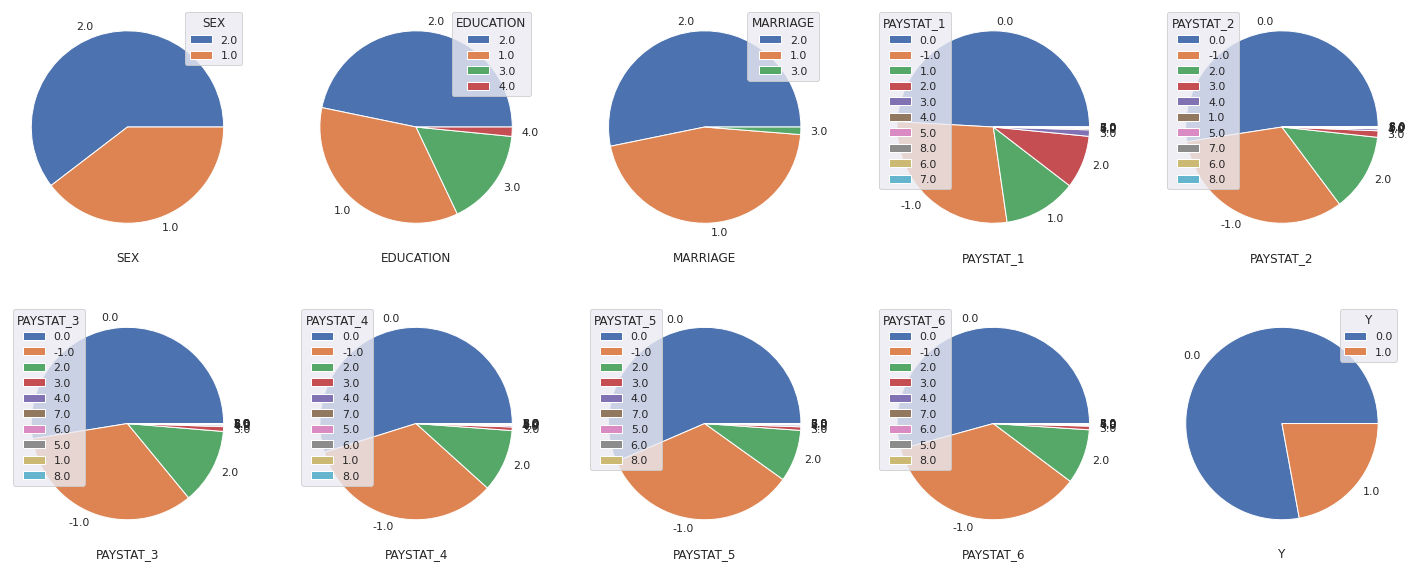

In [81]:
#cat_nom = ['SEX','EDUCATION','MARRIAGE','PAYSTAT_1','PAYSTAT_2','PAYSTAT_3','PAYSTAT_4','PAYSTAT_5','PAYSTAT_6','Y']

sns.set(rc={'figure.figsize':(25,10)})
fig, axes = plt.subplots(2, 5)
i = 0
for col in df_norm[cat_nom].columns:
  plt.subplot(2, 5,i+1)
  plt.pie(df_norm[col].value_counts(),labels = df_norm[col].value_counts().index.tolist())
  plt.legend(title = col)
  plt.xlabel(df_norm[cat_nom].columns[i])
  i = i + 1

Así mismo, otra manera de ver las variables categóricas es con graficas de barras:

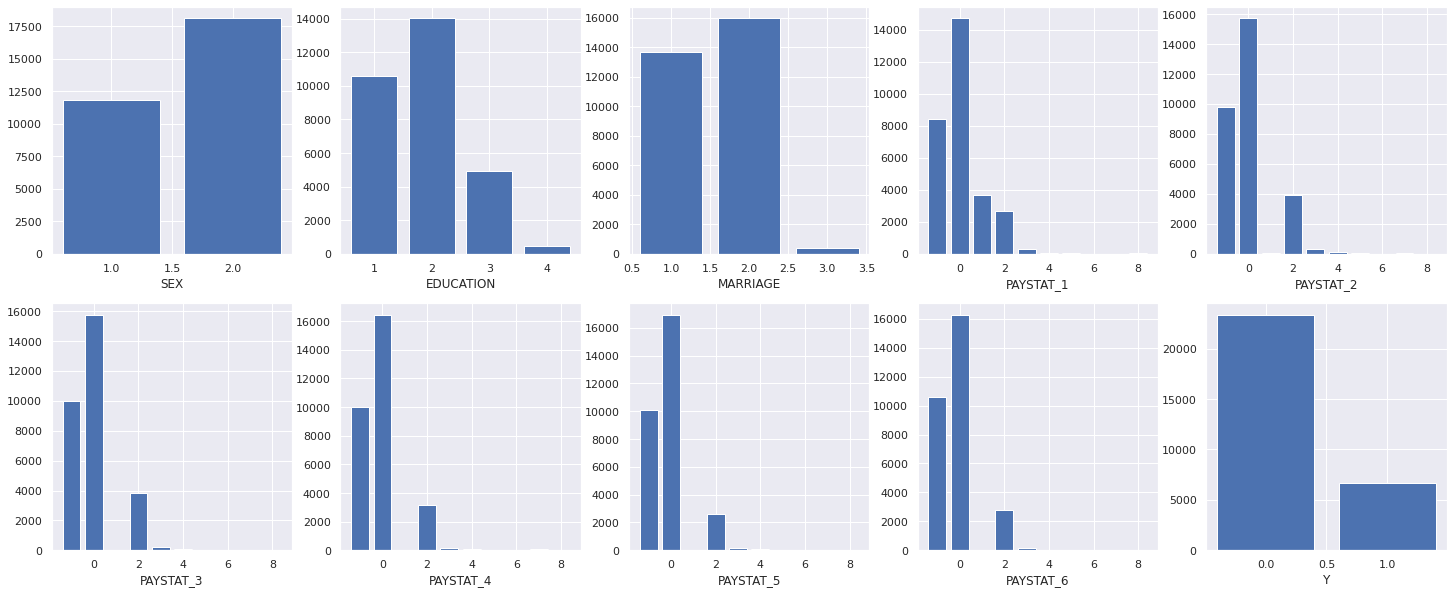

In [83]:
sns.set(rc={'figure.figsize':(25,10)})
fig, axes = plt.subplots(2, 5)
i = 0
for col in df_norm[cat_nom].columns:
  plt.subplot(2, 5,i+1)
  plt.bar(df_norm[col].value_counts().index.tolist(), df_norm[col].value_counts())  
  plt.xlabel(df_norm[cat_nom].columns[i])
  i = i + 1

Graficamos pairplot para ver la relación entre cada variable numérica:

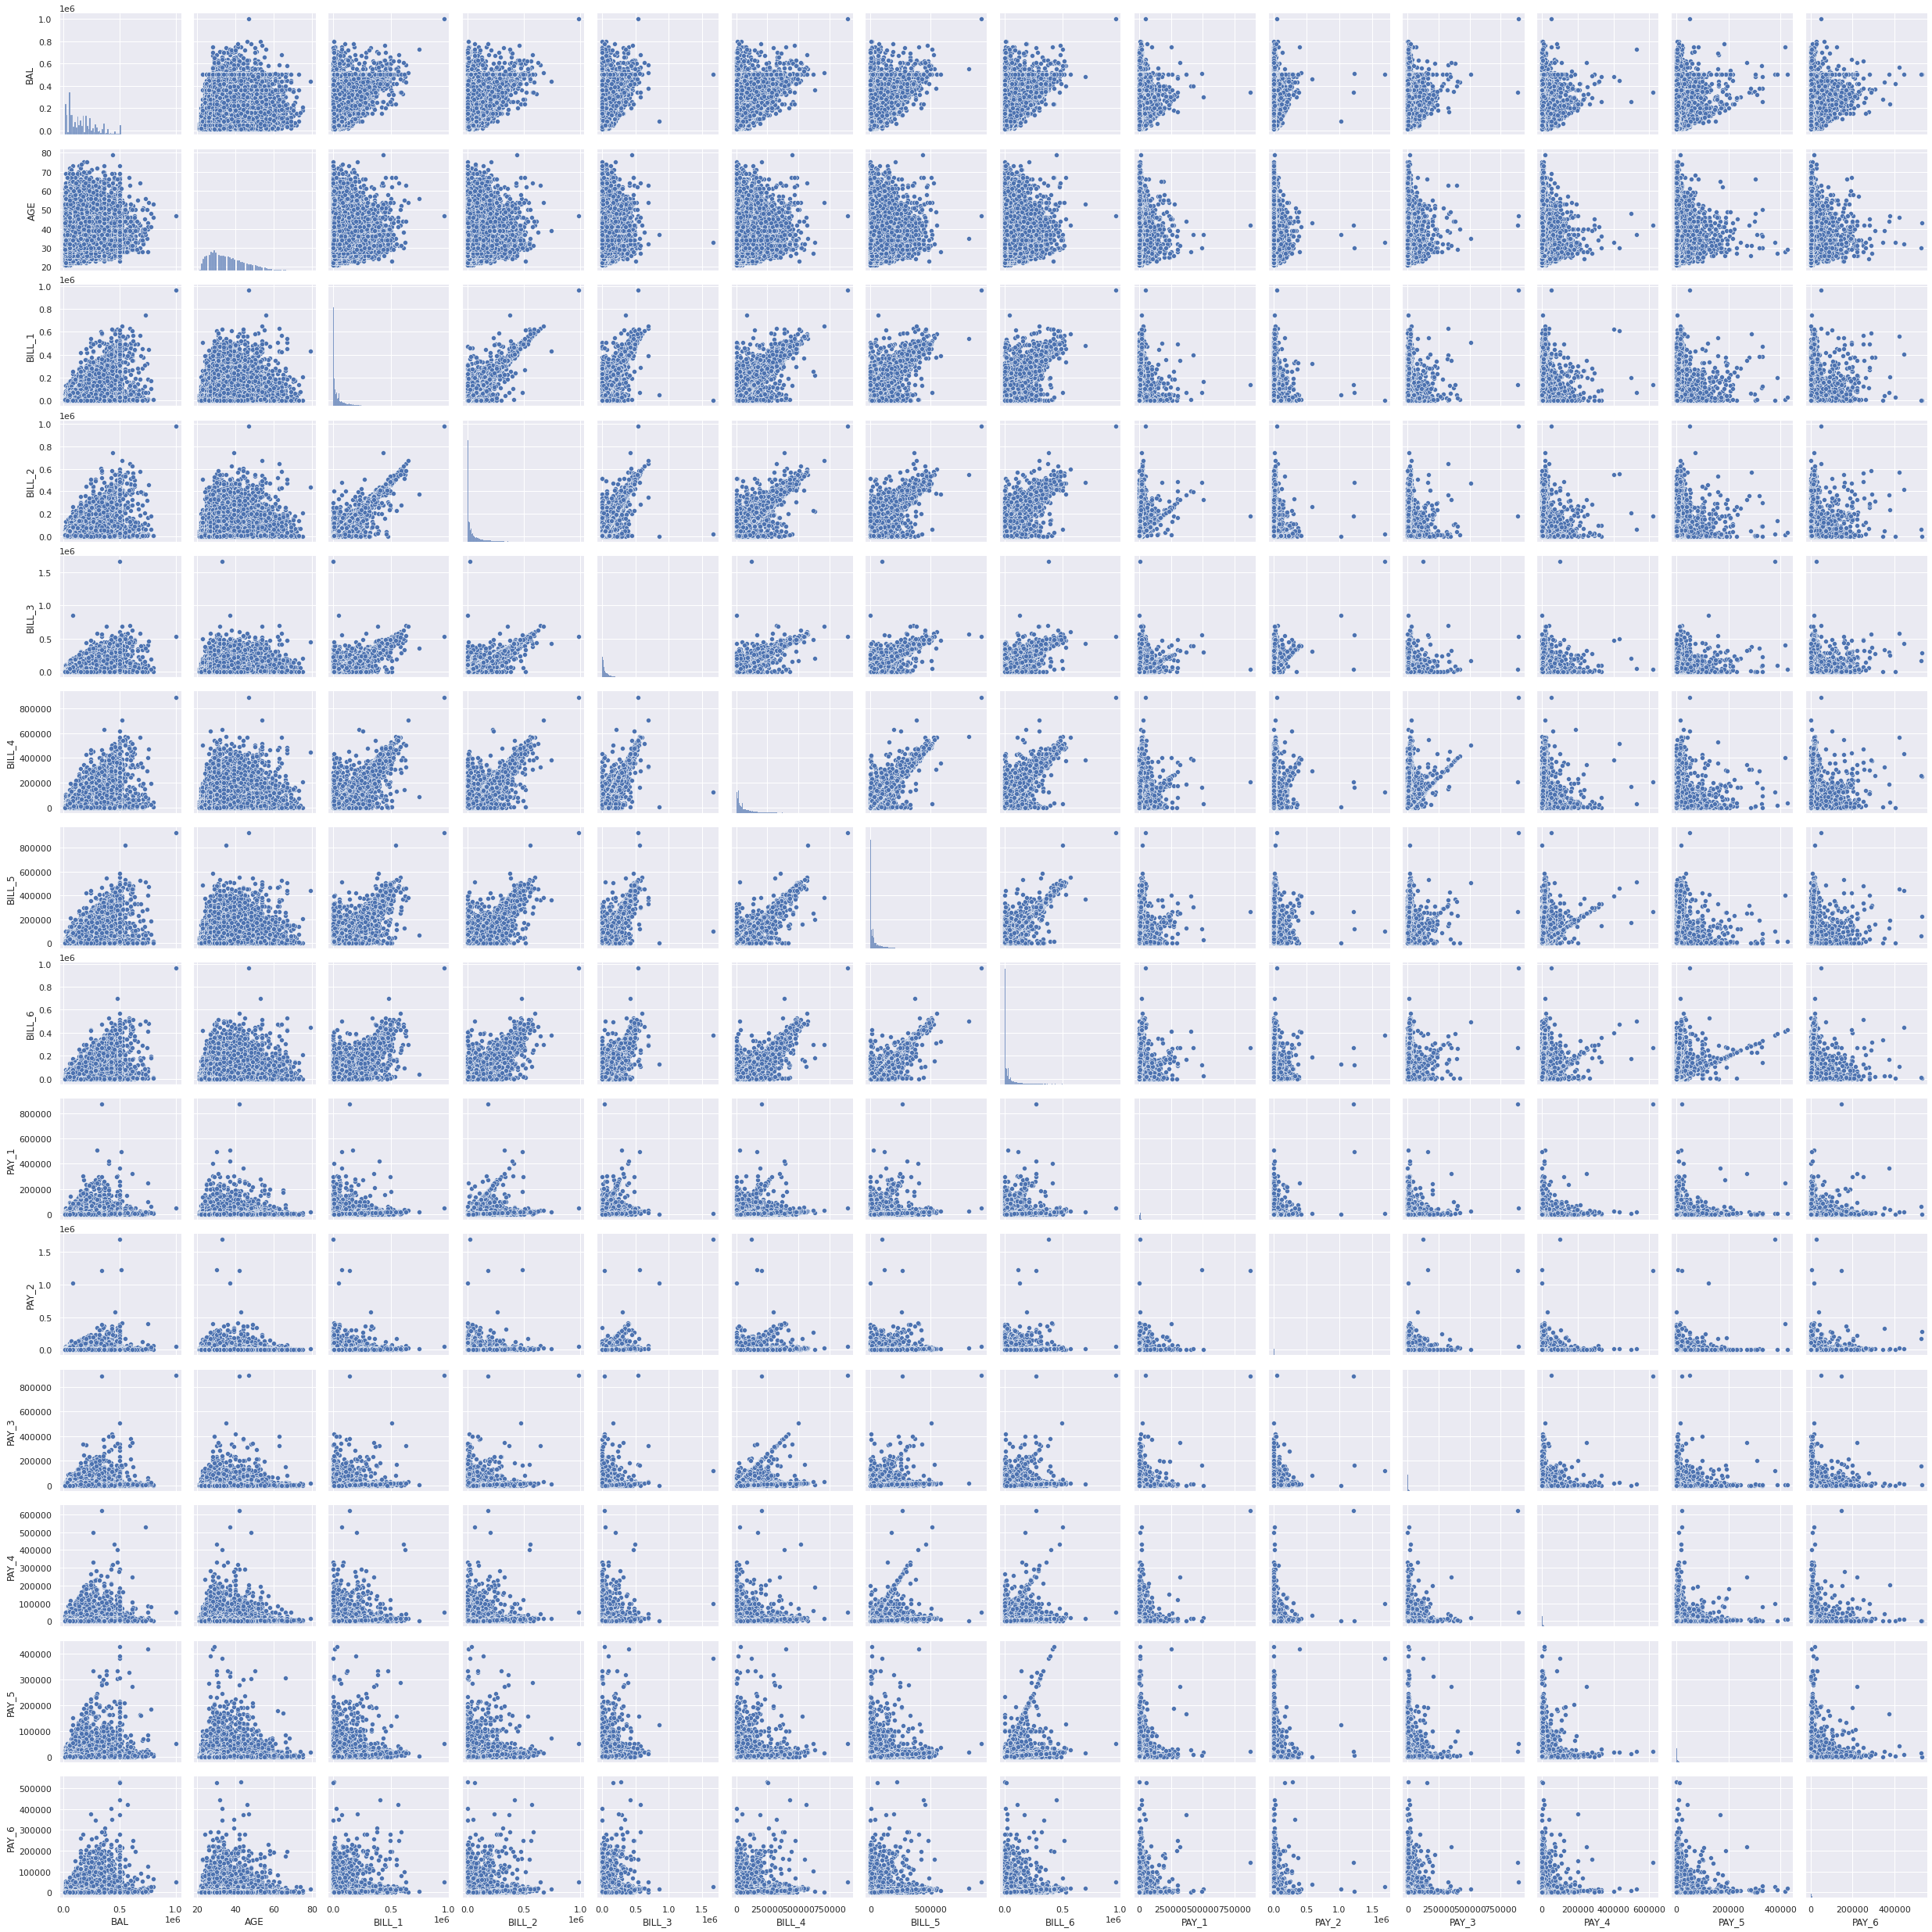

In [78]:
sns.pairplot(df_norm[num_nom])

## **10) Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones.**

* Viendo los histogramas de todas las variables numéricas, podemos observar que prácticamente todas tienen sesgo. Lo que nos dice que se podrían beneficiar de transformaciones numéricas que intente normalizarlos a una distribución gaussiana.  Y así poder generar un mejor modelo predictivo. 
* Los diagramas de bigote nos muestran una gran cantidad de datos atípicos. Lo cual nos indica que se deben buscar maneras de tratarlos o reducirlos para poder generar un buen modelo que no tenga problemas en interpretarlos. 
* Los pie charts nos permiten ver para cada variable categórica, una representación gráfica de sus posibles valores respecto a los mismos. Así es posible ver cuales valores de las mismas variables, son mínimos en comparación a los demás; y así poder tomar decisiones sobre ellos. 
* Otra manera de visualizar lo mencionado en el punto anterior es con graficas de barras
* Finalmente, el pairplot nos permite visualizar las relaciones de cada variable entre ellas mismas en el dataset. Así es posible ver gráficamente la relevancia o covarianza que tiene cada variable respecto a otra. Lo cual nos da herramientas para tomar decisiones. 